# Project: Investigate the Global Life Expectancy in the Last 50 years

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The purpose of this research is to look at the global population life expectancy in the last 50 years. The datasets used in the analysis were downloaded from gapminder, an organization data collects and translates data about the world into statistics. These databases may be found at Gapminder's website https://www.gapminder.org/data/ . They are:

- **Life Expectancy**: It is the average number of years a newborn will live should the present mortality patterns remain the same.

- **Life Expectancy Female**: It is the average number of years a newborn female will live should the present mortality patterns remain the same.

- **Life Expectancy Male**: It is the average number of years a newborn male will live should the present mortality patterns remain the same.

- **Government Share of Health Spending**: Is the average of health expenditure per citizen that has been subsidized by the government in US Dollars.

- **Gini Coefficient**: It represents the inequality in the society measured by the differences in income. The higher coefficient is, the grater the inequality. It represents how large are the income differences within a society.

- **GDP Per Capita/Yearly Grow (PPP)**: It represents the yearly percentage growth rate of Gross Domestic Product (PPP) per capita in terms of purchasing power. This theory compares and measures different currencies among countries in terms of purchasing power. Where, PPP stands for the purchasing power parity (PPP). The GDP per capita is calculated by dividing value of all final goods and services produced by midyear population of the country.

>This report intends to see if there is a relation between life expectancy and economic variables. To evaluate if economic or health economic variable, such as, the Government Share of Health Spending, may impact the increase or decrease a population's life expectancy.

The questions this report is looking to answer are:

**Female and Male Life Expectancies**
- In the last 50, which group had the higher average life expectancy, female or male?
- What country has the lowest average life expectancy for women?
- What country has the highest average life expectancy for women?
- What country has the lowest average life expectancy for men?
- What country has the highest average life expectancy for men?

**General Life Expectancy**
- What are the bottom 10 countries in average general life expectancy?
- What are the top 10 countries in average general life expectancy?

**Government Health Spending and General Life Expectancy**
- Is there a relationship between government health spending and life expectancy? Can government health spending contribute to a higher or lower life expectancy?
- What are the top 10 countries in average government health spending?
- Are the top 10 countries in average government health spending among the top 10 countries in average life expectancy?
- What are the bottom 10 countries in average government health spending? 
- Are the bottom 10 countries in average government health spending among the bottom 10 countries in average life expectancy? 

**Gini Coefficient and General Life Expectancy**
- Is there a relationship between the development index (Gini) and life expectancy? Can a low Gini Index contribute to a higher or lower life expectancy?
- What are the top 10 countries in average Gini Coefficient?
- Are the top 10 countries in average Gini Coefficient among the top 10 countries in average life expectancy?
- What are the bottom 10 countries in average Gini Coefficient? 
- Are the bottom 10 countries in average Gini Coefficient among the bottom 10 countries in average life expectancy?

**GDP Per Capita and General Life Expectancy**
- Is there a relationship between the GDP per capita and life expectancy? Can a higher GDP per capita contribute to a higher or lower life expectancy?
- What are the top 10 countries in average GDP per capita?
- Are the top 10 countries GDP within the top 10 countries with the highest life expectancy?
- What are the bottom 10 countries in average GDP per capita? 
- Are the bottom 10 countries GDP within the bottom 10 countries with the lowest life expectancy?


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the data will be loaded and inspected. By the end of it it will be clear all data that must be trimmed, cleaned and modified in order to enhance the analysis.

### General Properties
#### Import packages

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('darkgrid')
sns.set(style="ticks", color_codes=True)

%matplotlib inline

#### Load data

In [447]:
life_exp = pd.read_csv('life_expectancy.csv', index_col='country')
life_exp_f = pd.read_csv('life_expectancy_f.csv', index_col='country')
life_exp_m = pd.read_csv('life_expectancy_m.csv', index_col='country')
gdp = pd.read_csv('gdp.csv', index_col='country')
gini = pd.read_csv('gini.csv', index_col='country')
health_exp = pd.read_csv('health.csv', index_col='country')

#### Inspect data

 - We will look at the first few rows (df.head()) to have an idea of how each DataFrame looks like.
 - We will use df.info()to see a concise summary of a DataFrame.
 - We will look for NaN data (df.isna().sum().any()).

In [448]:
life_exp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [449]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 441.2+ KB


In [450]:
life_exp.isna().sum().any()

True

In [451]:
life_exp_f.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.4,28.6,29.2,29.7,30.2,30.7,31.2,31.7,32.2,32.7,...,79.1,79.2,79.4,79.5,79.6,79.7,79.9,80.0,80.1,80.2
Albania,55.2,55.3,55.7,56.3,56.9,57.7,58.7,59.8,60.9,62.1,...,89.9,90.0,90.1,90.2,90.3,90.5,90.6,90.7,90.8,90.9
Algeria,42.7,42.9,43.3,43.7,44.2,44.6,45.0,45.5,45.9,46.4,...,88.4,88.5,88.6,88.7,88.8,89.0,89.1,89.2,89.3,89.4
Angola,32.4,32.5,32.7,32.9,33.1,33.3,33.6,33.8,34.1,34.4,...,78.0,78.1,78.2,78.3,78.5,78.6,78.7,78.8,78.9,79.0
Antigua and Barbuda,59.8,60.0,60.5,61.0,61.5,61.9,62.4,62.9,63.3,63.7,...,87.9,88.0,88.2,88.3,88.4,88.5,88.6,88.7,88.8,88.9


In [452]:
life_exp_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 150 entries, 1950 to 2099
dtypes: float64(150)
memory usage: 217.1+ KB


In [453]:
life_exp_f.isna().sum().any()

False

In [454]:
life_exp_m.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,26.9,27.1,27.7,28.2,28.7,29.2,29.7,30.2,30.7,31.1,...,74.2,74.4,74.5,74.7,74.8,75.0,75.1,75.3,75.4,75.6
Albania,53.2,53.4,54.0,54.7,55.4,56.2,57.2,58.2,59.2,60.3,...,87.9,88.0,88.1,88.2,88.3,88.4,88.5,88.6,88.7,88.8
Algeria,41.5,41.7,42.1,42.5,42.9,43.3,43.7,44.1,44.6,45.0,...,87.0,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0
Angola,29.7,29.7,29.9,30.1,30.3,30.5,30.7,31.0,31.2,31.5,...,70.9,71.0,71.2,71.3,71.5,71.6,71.7,71.9,72.0,72.2
Antigua and Barbuda,55.0,55.2,55.8,56.3,56.8,57.3,57.8,58.2,58.7,59.1,...,85.7,85.8,85.9,86.0,86.1,86.2,86.4,86.5,86.6,86.7


In [455]:
life_exp_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 150 entries, 1950 to 2099
dtypes: float64(150)
memory usage: 217.1+ KB


In [456]:
life_exp_m.isna().sum().any()

False

In [457]:
gdp.head()

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.170,3.850,11.20,1.13,0.837,2.11,2.68,2.760,3.02,3.38
Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.28,1.72,2.610,3.82,4.72,5.030,5.03,5.23
Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.16,1.61,2.180,2.10,2.36,2.500,2.63,2.68
Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.13,1.03,2.240,2.46,2.77,0.262,3.46,3.55


In [458]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1801 to 2019
dtypes: float64(219)
memory usage: 333.4+ KB


In [459]:
gdp.isna().sum().any()

True

In [460]:
gini.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [461]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 241 entries, 1800 to 2040
dtypes: float64(241)
memory usage: 368.7+ KB


In [462]:
gini.isna().sum().any()

False

In [463]:
health_exp.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
Albania,13.9,17.10,14.2,18.60,28.10,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
Algeria,46.8,48.00,49.7,48.70,45.50,45.9,52.5,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00
Andorra,897.0,983.00,967.0,1340.00,942.00,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
Angola,13.5,8.72,10.5,6.65,6.55,12.5,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00


In [464]:
health_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
1995    187 non-null float64
1996    188 non-null float64
1997    188 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    188 non-null float64
2001    189 non-null float64
2002    188 non-null float64
2003    188 non-null float64
2004    188 non-null float64
2005    188 non-null float64
2006    188 non-null float64
2007    188 non-null float64
2008    188 non-null float64
2009    188 non-null float64
2010    185 non-null float64
dtypes: float64(16)
memory usage: 25.2+ KB


In [465]:
health_exp.isna().sum().any()

True

<a id='cleaning'></a>
## Data Cleaning

> In this section of the report, we will execute all the trimming, cleaning and modifying necessary to prepare the data to be analyzed.

#### Replace Null/NaN values
All NaN values we found in the previous section will be replaced by the row mean of values of each variable for each country from 1969 to 2019. 
We will check if NaN values were indeed replaced with isna().

#### Drop columns
For this analisys we will consider only the last 50 year of data from 1969 to 2019. Therefore, all columns pertaining to years previous from 1969 or estimates after 2019 will be dropped.

##### General Life Expectancy

In [466]:
life_exp = life_exp.apply(lambda row: row.fillna(row.mean()), axis=1)

In [467]:
life_exp.isna().sum().any()

False

In [468]:
life_exp.drop(life_exp.loc[:,'1800':'1968'].columns, axis = 1, inplace=True) 

In [469]:
life_exp.drop(life_exp.loc[:,'2020':'2100'].columns, axis = 1, inplace=True)

In [470]:
life_exp.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,45.900000,46.6,46.8,46.8,46.9,47.0,47.1,47.3,47.5,45.9,...,59.9,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.700000,64.100000
Albania,66.600000,66.9,67.5,68.1,68.7,69.3,69.8,70.3,70.8,71.2,...,77.6,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.300000,78.500000
Algeria,57.600000,58.1,58.4,58.8,59.2,59.7,60.1,60.6,61.2,61.8,...,76.3,76.5,76.8,76.9,77.0,77.1,77.4,77.7,77.900000,78.100000
Andorra,79.770833,75.5,75.8,76.1,76.4,76.7,77.0,77.2,77.5,77.8,...,82.3,82.4,82.4,82.5,82.5,82.6,82.7,82.7,79.770833,79.770833
Angola,45.900000,46.5,46.7,46.9,47.1,47.3,47.2,47.2,47.3,47.4,...,59.9,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.600000,65.000000


##### Female Life Expectancy

In [471]:
life_exp_f = life_exp_f.apply(lambda row: row.fillna(row.mean()), axis=1)

In [472]:
life_exp_f.isna().sum().any()

False

In [473]:
life_exp_f.drop(life_exp_f.loc[:,'1950':'1968'].columns, axis = 1, inplace=True) 

In [474]:
life_exp_f.drop(life_exp_f.loc[:,'2020':'2099'].columns, axis = 1, inplace=True)

In [475]:
life_exp_f.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37.1,37.5,38.0,38.4,38.9,39.4,39.9,40.4,40.9,41.5,...,62.5,62.9,63.4,63.8,64.2,64.6,65.0,65.4,65.8,66.2
Albania,68.1,68.4,68.8,69.2,69.6,70.0,70.4,70.7,71.0,71.4,...,79.2,79.5,79.7,79.9,80.1,80.3,80.5,80.6,80.7,80.9
Algeria,50.8,51.2,51.6,52.0,52.5,53.1,53.7,54.6,55.6,56.7,...,75.9,76.2,76.4,76.6,76.9,77.1,77.3,77.6,77.8,78.0
Angola,38.2,38.6,39.0,39.4,39.8,40.3,40.7,41.0,41.4,41.7,...,60.9,61.8,62.6,63.2,63.7,64.1,64.4,64.7,64.9,65.2
Antigua and Barbuda,67.7,68.1,68.4,68.8,69.1,69.4,69.8,70.1,70.4,70.7,...,77.8,78.0,78.1,78.3,78.4,78.6,78.7,78.9,79.0,79.2


##### Male Life Expectancy

In [476]:
life_exp_m = life_exp_m.apply(lambda row: row.fillna(row.mean()), axis=1)

In [477]:
life_exp_m.isna().sum().any()

False

In [478]:
life_exp_m.drop(life_exp_m.loc[:,'1950':'1968'].columns, axis = 1, inplace=True) 

In [479]:
life_exp_m.drop(life_exp_m.loc[:,'2020':'2099'].columns, axis = 1, inplace=True)

In [480]:
life_exp_m.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,35.5,35.9,36.4,36.8,37.3,37.8,38.3,38.8,39.3,39.9,...,60.1,60.5,60.9,61.3,61.7,62.0,62.4,62.8,63.1,63.4
Albania,65.3,65.5,65.7,66.0,66.4,66.8,67.2,67.6,67.9,68.2,...,74.4,74.9,75.3,75.7,76.0,76.2,76.4,76.5,76.7,76.8
Algeria,49.2,49.5,49.9,50.3,50.8,51.4,52.0,52.8,53.6,54.7,...,73.5,73.8,74.0,74.2,74.5,74.7,74.9,75.1,75.3,75.5
Angola,35.1,35.5,35.9,36.3,36.8,37.2,37.6,37.9,38.2,38.5,...,55.5,56.3,57.0,57.6,58.1,58.4,58.7,59.0,59.2,59.5
Antigua and Barbuda,62.8,63.1,63.4,63.7,64.0,64.3,64.6,64.9,65.2,65.5,...,72.9,73.1,73.2,73.4,73.5,73.7,73.8,74.0,74.2,74.3


##### Government Health Spending

In [481]:
health_exp = health_exp.apply(lambda row: row.fillna(row.mean()), axis=1)

In [482]:
health_exp.isna().sum().any()

False

In [483]:
health_exp.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,2.730333,2.730333,2.730333,2.730333,2.730333,2.730333,2.730333,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
Albania,13.900000,17.100000,14.200000,18.600000,28.100000,27.200000,30.500000,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
Algeria,46.800000,48.000000,49.700000,48.700000,45.500000,45.900000,52.500000,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00
Andorra,897.000000,983.000000,967.000000,1340.000000,942.000000,862.000000,890.000000,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
Angola,13.500000,8.720000,10.500000,6.650000,6.550000,12.500000,18.300000,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00


##### Gini Coefficient

In [484]:
gini = gini.apply(lambda row: row.fillna(row.mean()), axis=1)

In [485]:
gini.isna().sum().any()

False

In [486]:
gini.drop(gini.loc[:,'1800':'1968'].columns, axis = 1, inplace=True) 

In [487]:
gini.drop(gini.loc[:,'2020':'2040'].columns, axis = 1, inplace=True) 

In [488]:
gini.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.5,30.5,30.8,31.2,31.6,31.9,32.1,32.2,32.2,32.2,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
Albania,26.7,26.8,26.8,26.8,26.8,26.8,26.8,26.8,26.8,26.8,...,29.5,29.3,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0
Algeria,39.9,39.9,39.9,39.9,40.0,40.0,40.0,40.0,40.0,40.0,...,28.5,28.2,27.9,27.7,27.6,27.6,27.6,27.6,27.6,27.6
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Angola,54.9,54.8,54.7,54.6,54.5,54.4,54.4,54.3,54.2,54.1,...,42.9,42.7,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


##### GDP PPP

In [489]:
gdp = gdp.apply(lambda row: row.fillna(row.mean()), axis=1)

In [490]:
gdp.isna().sum().any()

False

In [491]:
gdp.drop(gdp.loc[:,'1801':'1968'].columns, axis = 1, inplace=True)

In [492]:
gdp.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.883,-0.514,-7.160,-4.36,8.580,2.750,2.530,2.330,-9.240,5.21,...,5.170,3.850,11.200000,1.130000,0.837000,2.110000,2.680000,2.760000,3.020000,3.380000
Albania,3.400,3.690,4.000,3.92,4.980,0.373,0.348,0.400,0.438,0.46,...,2.980,2.490,2.280000,1.720000,2.610000,3.820000,4.720000,5.030000,5.030000,5.230000
Algeria,6.480,6.830,-11.100,17.50,0.285,3.010,3.890,3.420,5.770,9.42,...,2.060,0.857,1.160000,1.610000,2.180000,2.100000,2.360000,2.500000,2.630000,2.680000
Andorra,3.800,3.800,-0.603,2.76,2.630,0.870,-3.590,-0.531,-0.634,-1.92,...,-4.780,-4.300,1.560815,1.560815,1.560815,1.560815,1.560815,1.560815,1.560815,1.560815
Angola,1.150,4.510,3.880,-1.97,5.680,0.714,-7.370,-7.630,-1.870,-7.87,...,0.594,1.030,2.130000,1.030000,2.240000,2.460000,2.770000,0.262000,3.460000,3.550000


#### Create a new DataFrame
We will join information to perform comparisons across indicators. For these comparisons we will use each indicator's mean during the last 50 years for each country.

#### Get the overall average values for each indicator

In [493]:
avg_life_exp = life_exp.mean(axis=1)
avg_life_exp.index = life_exp.index
avg_life_exp_f = life_exp_f.mean(axis=1)
avg_life_exp_f.index = life_exp_f.index
avg_life_exp_m = life_exp_m.mean(axis=1)
avg_life_exp_m.index = life_exp_m.index
avg_govt_health_spe = health_exp.mean(axis=1)
avg_govt_health_spe .index = health_exp.index
avg_gini = gini.mean(axis=1)
avg_gini.index = gini.index
avg_gdp = gdp.mean(axis=1)
avg_gdp.index = gdp.index

<a id='df_combined'></a>
#### Concatenate all average values to the life expectancy DataFrame

In [494]:
df_combined = pd.concat([avg_life_exp, avg_life_exp_f, avg_life_exp_m, avg_gdp, avg_gini, avg_govt_health_spe], axis=1, sort=True,verify_integrity=True)
df_combined.columns=['avg_life_exp', 'avg_life_exp_f', 'avg_life_exp_m', 'avg_gdp', 'avg_gini', 'avg_govt_health_spe']
df_combined.index=gini.index
df_combined.head()

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Afghanistan,52.515686,52.368627,50.296078,1.606333,34.990196,2.730333
Albania,73.784314,75.368627,70.652941,2.543294,28.143137,52.018750
Algeria,70.305882,67.433333,64.880392,1.584529,35.043137,75.437500
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.062500
Angola,52.278431,49.245098,44.843137,1.347567,50.254902,42.845000


#### NaN Values in the combined DataFrame

- The NaN values in this DataFrame (above) refer to information that was not available in the specific original file, such as, the female and male life expectancy for Andorra.

- Therefore, we can not replace it by a mean.

#### Create visualization for the missing values

In [495]:
df_combined[df_combined.isnull().any(axis=1)]

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.06250
Dominica,72.958333,NaN,NaN,2.993549,40.000000,174.37500
Holy See,NaN,NaN,NaN,NaN,40.000000,NaN
Liechtenstein,NaN,NaN,NaN,2.442735,40.000000,NaN
Marshall Islands,62.277083,NaN,NaN,1.189616,40.000000,367.25000
Monaco,NaN,NaN,NaN,1.989773,40.000000,3573.12500
Nauru,NaN,NaN,NaN,1.597629,40.000000,346.62500
North Korea,69.449020,70.386275,63.498039,-0.218871,37.000000,NaN
Palau,NaN,NaN,NaN,-0.037333,40.000000,589.93750


In [496]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
avg_life_exp           187 non-null float64
avg_life_exp_f         184 non-null float64
avg_life_exp_m         184 non-null float64
avg_gdp                194 non-null float64
avg_gini               195 non-null float64
avg_govt_health_spe    190 non-null float64
dtypes: float64(6)
memory usage: 10.7+ KB


#### Drop NaN values

- General life expectancy is the main and most relevant variable in this report. Therefore, we will keep the rows that have NaN values in other variables but have a valid number for the general life expectancy.            
           			    	  
North Korea	 	      	         		     
- avg_life_exp: 69.449020
- avg_life_exp_f: 70.386275
- avg_life_exp_m:	63.498039
- avg_gdp: -0.315557
- avg_gini: 37.000000
- avg_govt_health_spe: NaN


- This way even though we won't be able to compare North Korea's average government health spending to the general life expectancy, we will still be able to run comparisons with the other variables.

- All rows that have missing general life expectancy information will be dropped. 

In [497]:
df_combined.dropna(subset=['avg_life_exp'], inplace=True)

In [498]:
df_combined.isna().sum().any()

True

In [499]:
df_combined[df_combined.isnull().any(axis=1)]

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.0625
Dominica,72.958333,NaN,NaN,2.993549,40.000000,174.3750
Marshall Islands,62.277083,NaN,NaN,1.189616,40.000000,367.2500
North Korea,69.449020,70.386275,63.498039,-0.218871,37.000000,NaN
Palestine,69.560784,69.215686,65.764706,1.217592,34.100000,NaN
South Sudan,53.441176,47.358824,44.837255,1.479449,45.029412,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> Now that our data is ready to move on to exploration. In this section we will address the questions posed in the introduction section. 
We will look at one variable at a time, and then follow it up by looking at relationships between variables. The order is as follows:

<ul>
 <li><a href="#OVER">Variables Overview</a></li>   
<li><a href="#FEMALE">Female and Male Life Expectancies</a></li>
<li><a href="#GENERAL">General Life Expectancy</a></li>
<li><a href="#GOVT">Government Health Spending and General Life Expectancy</a></li>
<li><a href="#GINI">Gini Coefficient and General Life Expectancy</a></li>
<li><a href="#GDP">GDP Per Capita and General Life Expectancy</a></li>
</ul>



<a id='OVER'></a>
## Variables Overview

We will draw a correlation matrix in order to see overall the associations between the variables we are analyzing.

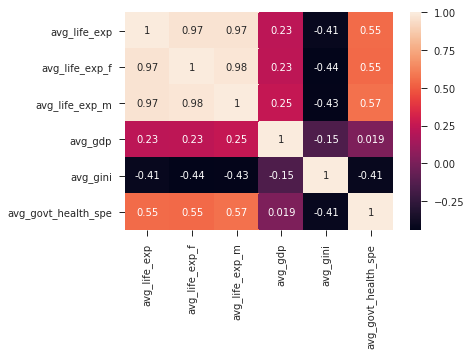

In [500]:
df_combined_corrMatrix = df_combined.corr()
sns.heatmap(df_combined_corrMatrix, annot=True)
plt.show()

A value close to 1 indicates stronger positive/regular correlation, closer to a linear function. A value close to -1 indicates stronger negative/inverse correlation, closer to a linear function. A value closer to 0 indicates weaker correlation.

- It seems that there is a positive correlation (0.97-0.98) between all life expectancy variables (general, female and male), as it should be.

- It seems that there is a positive medium correlation (0.55-0.57) between the life expectancy variables (general, female and male) and government health spending.

- It seems that there is a weak correlation between the life expectancy variables (general, female and male) and GDP PPP (0.23-0.25).

- The Gini Coefficient seems to have a negative/inverse correlation with all the other variables.

<a id='FEMALE'></a>
## Female and Male Life Expectancies
### In the last 50, which group had the higher average life expectancy, female or male?

First we will check the average life expectancy by female and male

In [502]:
Female = avg_life_exp_f.mean()
print('The global female average life expectancy is {} years old.'.format(round(Female)))

The global female average life expectancy is 68.0 years old.


In [503]:
Male = avg_life_exp_m.mean()
print('The global male average life expectancy is {} years old.'.format(round(Male)))

The global male average life expectancy is 63.0 years old.


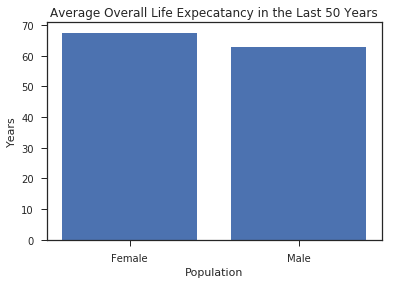

In [504]:
locations = [1,2]
heights = [Female, Male]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Overall Life Expecatancy in the Last 50 Years')
plt.xlabel('Population')
plt.ylabel('Years');

In [505]:
Proportion_F_M = ((Female/Male)-1)*100
print('Women tend to live {} % longer than Men.'.format(round(Proportion_F_M)))

Women tend to live 8.0 % longer than Men.


### In the last 50, which country had the highest and which had the lowest average life expectancy per gender?

#### Females

#### What country has the lowest average life expectancy for women?

In [506]:
low_f = avg_life_exp_f.nsmallest(1, )
print('The lowest life expectancy for females is in \n {}.'.format(low_f))

The lowest life expectancy for females is in 
 country
Sierra Leone    42.111765
dtype: float64.


#### What country has the highest average life expectancy for women?

In [507]:
high_f = avg_life_exp_f.nlargest(1, )
print('The highest life expectancy for females is in \n {}'.format(high_f))

The highest life expectancy for females is in 
 country
Japan    82.298039
dtype: float64


#### Males

#### What country has the lowest average life expectancy for men?

In [508]:
low_m = avg_life_exp_m.nsmallest(1, )
print('The lowest life expectancy for males is in \n {}.'.format(low_m))

The lowest life expectancy for males is in 
 country
Sierra Leone    40.956863
dtype: float64.


#### What country has the highest average life expectancy for men?

In [509]:
high_m = avg_life_exp_m.nlargest(1, )
print('The highest life expectancy for males is in \n {}'.format(high_m))

The highest life expectancy for males is in 
 country
Iceland    76.54902
dtype: float64


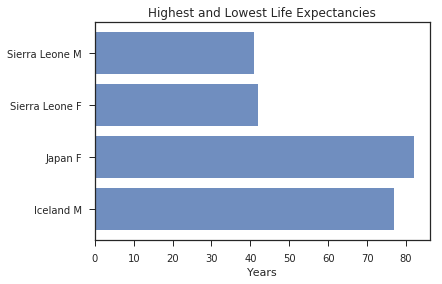

In [556]:
plt.barh(['Sierra Leone F', 'Japan F','Sierra Leone M', 'Iceland M'],[42, 82, 41, 77], alpha=.8)
plt.title('Highest and Lowest Life Expectancies')
plt.xlabel('Years');

<a id='GENERAL'></a>
### General Life Expectancy (Male and Female)

#### What are the bottom 10 countries in average general life expectancy?

In [511]:
avg_life_exp_bottom_10 = avg_life_exp.nsmallest(10,)
avg_life_exp_bottom_10

country
Central African Republic    47.492157
Burundi                     49.535294
Malawi                      49.815686
Guinea-Bissau               50.211765
Niger                       50.286275
Mozambique                  50.554902
Sierra Leone                51.096078
Mali                        51.111765
Eritrea                     51.578431
Ethiopia                    51.829412
dtype: float64

In [512]:
bt_10_avg = avg_life_exp_bottom_10.mean()
print('The average life expectancy among the bottom 10 countries is {} years.'.format(round(bt_10_avg)))

The average life expectancy among the bottom 10 countries is 50.0 years.


In [513]:
avg_life_exp_top_10 = avg_life_exp.nlargest(10, )
avg_life_exp_top_10

country
Andorra        79.770833
Japan          79.596078
Switzerland    78.956863
Iceland        78.821569
Sweden         78.578431
Greece         78.066667
Spain          77.962745
Norway         77.898039
Canada         77.870588
Italy          77.827451
dtype: float64

In [514]:
tp_10_avg = avg_life_exp_top_10.mean()
print('The average life expectancy among the top 10 countries is {} years.'.format(round(tp_10_avg)))

The average life expectancy among the top 10 countries is 79.0 years.


In [515]:
Proportion_T_B = ((tp_10_avg/bt_10_avg)-1)*100
print('People in the top 10 countries tend to live in average {} % longer than people in the bottom 10 countries.'.format(round(Proportion_T_B)))

People in the top 10 countries tend to live in average 56.0 % longer than people in the bottom 10 countries.


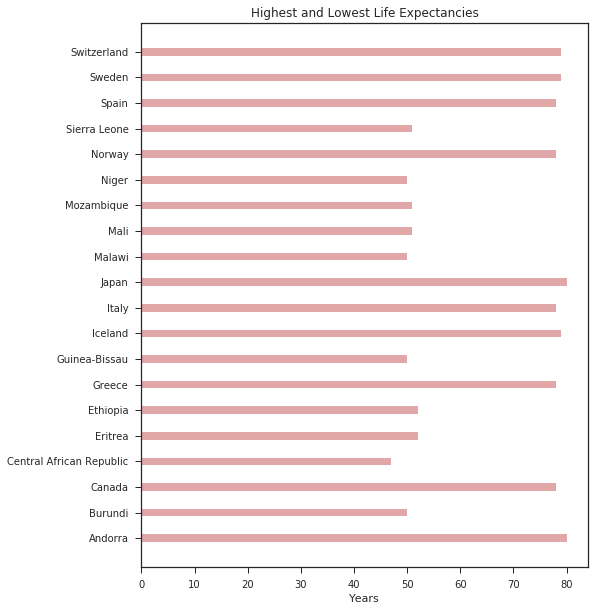

In [516]:
width = 0.3
plt.figure(figsize=(8,10))
plt.barh(['Central African Republic', 'Burundi', 'Malawi', 'Guinea-Bissau', 'Niger', 'Mozambique', 'Sierra Leone', 'Mali', 'Eritrea', 'Ethiopia', 'Andorra', 'Japan' , 'Switzerland', 'Iceland', 'Sweden', 'Greece', 'Spain', 'Norway', 'Canada', 'Italy'],[47, 50, 50, 50, 50, 51, 51, 51, 52, 52, 80, 80, 79, 79, 79, 78, 78, 78, 78, 78], width, color = 'r', alpha=.5)
plt.title('Highest and Lowest Life Expectancies')
plt.xlabel('Years');

<a id='GOVT'></a>
## Government Health Spending and General Life Expectancy

### Is there a relationship between government health spending and life expectancy? Can government health spending contribute to a higher or lower life expectancy?

#### What are the top 10 countries in average government health spending?

In [517]:
avg_govt_health_spe_top_10 = avg_govt_health_spe.nlargest(10, )
avg_govt_health_spe_top_10

country
Luxembourg       4353.125
Norway           4166.250
Monaco           3573.125
Denmark          3420.000
Iceland          3071.875
Switzerland      2915.625
Sweden           2686.875
Germany          2649.375
United States    2646.250
Austria          2635.000
dtype: float64

In [518]:
ghs_10_t_avg = avg_govt_health_spe_top_10.mean()
print('The average government health spending among the top 10 countries is {} US dollars.'.format(round(ghs_10_t_avg)))

The average government health spending among the top 10 countries is 3212.0 US dollars.


#### Are the top 10 countries in average government health spending among the top 10 countries in average life expectancy?

To try to answer this question we will combine the DataFrames with the top 10 life expectancy variable and the top 10 government health spending variable, and see if they match. We will order it by the average life expectancy.

In [519]:
df_combined_gvt_sp_lf_exp_t_10 = pd.concat([avg_life_exp_top_10, avg_govt_health_spe_top_10], axis=1, sort=True)
df_combined_gvt_sp_lf_exp_t_10.columns=['avg_life_exp_top_10','avg_govt_health_spe_top_10']
df_combined_gvt_sp_lf_exp_t_10.sort_values(by='avg_life_exp_top_10', ascending=False)


,avg_life_exp_top_10,avg_govt_health_spe_top_10
Andorra,79.770833,NaN
Japan,79.596078,NaN
Switzerland,78.956863,2915.625
Iceland,78.821569,3071.875
Sweden,78.578431,2686.875
Greece,78.066667,NaN
Spain,77.962745,NaN
Norway,77.898039,4166.250
Canada,77.870588,NaN
Italy,77.827451,NaN


> The NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_top_10 column, the country is not among the top 10 life expectancy. If NaN appears on the avg_govt_health_spe_top_10 the country is not among the top 10 government health spending.

However, since we already did have NaN values in our <a href="#df_combined">Combined Dataframe</a> to start with. We will check if the value for government spending is NaN in some rows because the information was not available in the first place, using the <a href="#df_combined">Combined Dataframe</a> (df_combined).

In [520]:
df_combined[df_combined.isnull().any(axis=1)]

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.0625
Dominica,72.958333,NaN,NaN,2.993549,40.000000,174.3750
Marshall Islands,62.277083,NaN,NaN,1.189616,40.000000,367.2500
North Korea,69.449020,70.386275,63.498039,-0.218871,37.000000,NaN
Palestine,69.560784,69.215686,65.764706,1.217592,34.100000,NaN
South Sudan,53.441176,47.358824,44.837255,1.479449,45.029412,NaN


Only North Korea, Palastine and South Sudan have no governement health spending information, and none of those countries were at the top 10 government health spending nor the top 10 life expectancy (df_combined_gvt_sp_lf_exp_t_1). Therefore, the above findings are fine.

Continuing to explore the findings from the combined Dataframe of the top 10 government health spending and the top 10 life expectancy (df_combined_gvt_sp_lf_exp_t_1), only 4 countries with the top 10 government expenditures on health are among the countries with the highest life expectancy. They are: Switzerland, Iceland, Sweden, and Norway.

We evinced this by dropping all the NaN values from the combined DataFrame (df_combined_gvt_sp_lf_exp_t_10) in the cell bellow.

In [521]:
df_combined_gvt_sp_lf_exp_t_10.dropna(inplace=True)
df_combined_gvt_sp_lf_exp_t_10

,avg_life_exp_top_10,avg_govt_health_spe_top_10
Iceland,78.821569,3071.875
Norway,77.898039,4166.250
Sweden,78.578431,2686.875
Switzerland,78.956863,2915.625


In [522]:
Govt_Proportion_T = ((4/10))*100
print('{} % of the top government health spending countries are among the top 10 countries with highest life expectancy.'.format(round(Govt_Proportion_T)))

40 % of the top government health spending countries are among the top 10 countries with highest life expectancy.


#### What are the bottom 10 countries in average government health spending?

In [523]:
avg_govt_health_spe_bottom_10 = avg_govt_health_spe.nsmallest(10, )
avg_govt_health_spe_bottom_10

country
Myanmar             0.692813
Congo, Dem. Rep.    2.156375
Somalia             2.620000
Afghanistan         2.730333
Sierra Leone        3.725625
Guinea              3.779375
Burundi             3.940000
Ethiopia            4.024375
Guinea-Bissau       4.143750
Eritrea             4.166875
dtype: float64

In [524]:
ghs_10_b_avg = avg_govt_health_spe_bottom_10.mean()
print('The average government health spending among the bottom 10 countries is {} US dollars.'.format(round(ghs_10_b_avg)))

The average government health spending among the bottom 10 countries is 3.0 US dollars.


In [525]:
Proportion_T_B_GHS = ((ghs_10_t_avg/ghs_10_b_avg)-1)*100
print('The government expenditure in health per person in the top 10 countries is in average {} % greater than the government expenditure in the bottom 10 countries.'.format(round(Proportion_T_B_GHS)))

The government expenditure in health per person in the top 10 countries is in average 100331.0 % greater than the government expenditure in the bottom 10 countries.


#### Are the bottom 10 countries in average government health spending among the bottom 10 countries in average life expectancy?

To try to answer this question we will combine the DataFrames with the bottom 10 life expectancy variable and the bottom 10 government health spending variable, and see if they match. We will order it by the average life expectancy.

In [526]:
df_combined_gvt_sp_lf_exp_b_10 = pd.concat([avg_life_exp_bottom_10, avg_govt_health_spe_bottom_10], axis=1, ignore_index=True, sort=True)
df_combined_gvt_sp_lf_exp_b_10.columns=['avg_life_exp_bottom_10','avg_govt_health_spe_bottom_10']
df_combined_gvt_sp_lf_exp_b_10.sort_values(by='avg_life_exp_bottom_10', ascending=False)

,avg_life_exp_bottom_10,avg_govt_health_spe_bottom_10
Ethiopia,51.829412,4.024375
Eritrea,51.578431,4.166875
Mali,51.111765,NaN
Sierra Leone,51.096078,3.725625
Mozambique,50.554902,NaN
Niger,50.286275,NaN
Guinea-Bissau,50.211765,4.143750
Malawi,49.815686,NaN
Burundi,49.535294,3.940000
Central African Republic,47.492157,NaN


> Likewise the previous combined DataFrame for the top 10, the NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_bottom_10 column, the country is not among the bottom 10 life expectancy. If NaN appears on the avg_govt_health_spe_bottom_10 the country is not among the bottom 10 government health spending.

Half the countries with the bottom 10 goverment expenditures on health are among the countries with the lowest life expectancy. They are: Ethiopia, Eritrea, Sierra Leone, Guinea-Bissau and Burundi.

We evinced this by dropping all the NaN values from the combined DataFrame (df_combined_gvt_sp_lf_exp_b_10) in the cell bellow.

In [527]:
df_combined_gvt_sp_lf_exp_b_10.dropna(inplace=True)
df_combined_gvt_sp_lf_exp_b_10

,avg_life_exp_bottom_10,avg_govt_health_spe_bottom_10
Burundi,49.535294,3.940000
Eritrea,51.578431,4.166875
Ethiopia,51.829412,4.024375
Guinea-Bissau,50.211765,4.143750
Sierra Leone,51.096078,3.725625


In [528]:
Govt_Proportion_B = ((5/10))*100
print('{} % of the bottom government health spending countries are among the bottom 10 countries with lowest life expectancy.'.format(round(Govt_Proportion_B)))

50 % of the bottom government health spending countries are among the bottom 10 countries with lowest life expectancy.


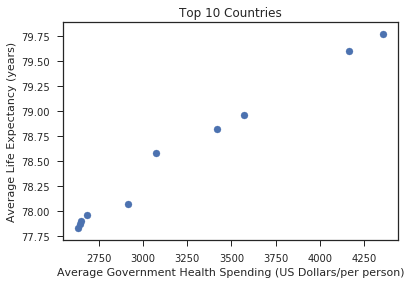

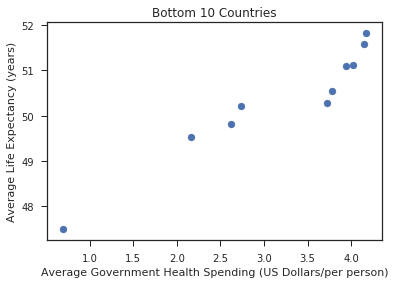

In [529]:
x = avg_govt_health_spe_top_10
y = avg_life_exp_top_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average Government Health Spending (US Dollars/per person)')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Top 10 Countries')
plt.show()

x = avg_govt_health_spe_bottom_10
y = avg_life_exp_bottom_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average Government Health Spending (US Dollars/per person)')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Bottom 10 Countries')
plt.show()

The scatter plots above demonstrate that there is some correlation between government spending in health and life expectancy. And it is a positive one, where the more dollars spent the higher the life expectancy.  

<a id='GINI'></a>
### Gini Coefficient and General Life Expectancy

### Is there a relationship between the development index (Gini) and life expectancy? Can a low Gini Index contribute to a higher or lower life expectancy?

#### What are the top 10 countries in average Gini Coefficient?
Obs: the lowest the Gini Coefficient the 'better'. So the countries with the smallest values are the top.

In [530]:
avg_gini_top_10 = avg_gini.nsmallest(10, )
avg_gini_top_10

country
Czech Republic     23.052941
Slovak Republic    23.588235
Sweden             24.286275
Belgium            25.270588
Hungary            25.301961
Denmark            25.349020
Finland            25.415686
Belarus            25.550980
Romania            25.752941
Iceland            26.611765
dtype: float64

In [531]:
gini_10_t_avg = avg_gini_top_10.mean()
print('The average Gini Coefficient among the top 10 countries is {}.'.format(round(gini_10_t_avg)))

The average Gini Coefficient among the top 10 countries is 25.0.


#### Are the top 10 countries in average Gini Coefficient among the top 10 countries in average life expectancy?

To try to answer this question we will combine the DataFrames with the top 10 life expectancy variable and the top 10 Gini Index variable, and see if they match. We will order it by the average life expectancy.

In [532]:
df_combined_gini_lf_exp_t_10 = pd.concat([avg_life_exp_top_10, avg_gini_top_10], axis=1, ignore_index=True, sort=True)
df_combined_gini_lf_exp_t_10.columns=['avg_life_exp_top_10', 'avg_gini_top_10']
df_combined_gini_lf_exp_t_10.sort_values(by='avg_life_exp_top_10', ascending=False)

,avg_life_exp_top_10,avg_gini_top_10
Andorra,79.770833,NaN
Japan,79.596078,NaN
Switzerland,78.956863,NaN
Iceland,78.821569,26.611765
Sweden,78.578431,24.286275
Greece,78.066667,NaN
Spain,77.962745,NaN
Norway,77.898039,NaN
Canada,77.870588,NaN
Italy,77.827451,NaN


> Likewise the government health spending variable, the NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_top_10 column, the country is not among the top 10 life expectancy. If NaN appears on the avg_gini_top_10 the country is not among the top 10 Gini Coefficient.

However, since we already did have NaN values in our <a href="#df_combined">Combined Dataframe</a> to start with. We will check if the value for the Gini Coefficient  is NaN in some rows because the information was not available in the first place, using the <a href="#df_combined">Combined Dataframe</a> (df_combined).

In [533]:
df_combined[df_combined.isnull().any(axis=1)]

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.0625
Dominica,72.958333,NaN,NaN,2.993549,40.000000,174.3750
Marshall Islands,62.277083,NaN,NaN,1.189616,40.000000,367.2500
North Korea,69.449020,70.386275,63.498039,-0.218871,37.000000,NaN
Palestine,69.560784,69.215686,65.764706,1.217592,34.100000,NaN
South Sudan,53.441176,47.358824,44.837255,1.479449,45.029412,NaN


Out of the NaN information in the dataframe we are using for this analysis, none regards to the Gini Index. Therefore, the above findings are fine.

Continuing to explore the findings from the combined Dataframe of the top 10 Gini Coefficient and the top 10 life expectancy (df_combined_gini_lf_exp_t_10), only 2 countries with the top 10 Gini Coefficient are among the countries with the highest life expectancy. They are: Iceland and Sweden.

We evinced this by dropping all the NaN values from the combined DataFrame (df_combined_gini_lf_exp_t_10) in the cell bellow.

In [534]:
df_combined_gini_lf_exp_t_10.dropna(inplace=True)
df_combined_gini_lf_exp_t_10

,avg_life_exp_top_10,avg_gini_top_10
Iceland,78.821569,26.611765
Sweden,78.578431,24.286275


In [535]:
Gini_Proportion_T = ((2/10))*100
print('{} % of the top 10 Gini Coefficient countries are among the top 10 countries with highest life expectancy.'.format(round(Gini_Proportion_T)))

20 % of the top 10 Gini Coefficient countries are among the top 10 countries with highest life expectancy.


#### What are the bottom 10 countries in average Gini Coefficient?

In [536]:
avg_gini_bottom_10 = avg_gini.nlargest(10, )
avg_gini_bottom_10

country
South Africa                63.435294
Namibia                     61.739216
Central African Republic    59.474510
Zambia                      58.823529
Botswana                    58.486275
Honduras                    58.147059
Belize                      57.194118
Swaziland                   56.756863
Haiti                       56.309804
Lesotho                     56.023529
dtype: float64

In [537]:
gini_10_b_avg = avg_gini_bottom_10.mean()
print('The average Gini Coefficient among the bottom 10 countries is {}.'.format(round(gini_10_b_avg)))

The average Gini Coefficient among the bottom 10 countries is 59.0.


In [538]:
Proportion_T_B_GINI = ((gini_10_b_avg/gini_10_t_avg)-1)*100
print('The Gini Coefficient in the bottom 10 countries is in average {} % greater than the Gini Coefficient in the top 10 countries.'.format(round(Proportion_T_B_GINI)))

The Gini Coefficient in the bottom 10 countries is in average 134.0 % greater than the Gini Coefficient in the top 10 countries.


#### Are the bottom 10 countries in average Gini Coefficient among the bottom 10 countries in average life expectancy?

To try to answer this question we will combine the DataFrames with the bottom 10 life expectancy variable and the bottom 10 Gini Index variable, and see if they match. We will order it by the average life expectancy.

In [539]:
df_combined_gini_lf_exp_b_10 = pd.concat([avg_life_exp_bottom_10, avg_gini_bottom_10], axis=1, ignore_index=True, sort=True)
df_combined_gini_lf_exp_b_10.columns=['avg_life_exp_bottom_10', 'avg_gini_bottom_10']
df_combined_gini_lf_exp_b_10.sort_values(by='avg_life_exp_bottom_10', ascending=False)

,avg_life_exp_bottom_10,avg_gini_bottom_10
Ethiopia,51.829412,NaN
Eritrea,51.578431,NaN
Mali,51.111765,NaN
Sierra Leone,51.096078,NaN
Mozambique,50.554902,NaN
Niger,50.286275,NaN
Guinea-Bissau,50.211765,NaN
Malawi,49.815686,NaN
Burundi,49.535294,NaN
Central African Republic,47.492157,59.474510


> Likewise the previous combined DataFrame for the top 10, the NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_bottom_10 column, the country is not among the bottom 10 life expectancy. If NaN appears on the avg_gini_bottom_10 the country is not among the bottom 10 Gini Index.

Continuing to explore the findings from the combined Dataframe of the bottom 10 Gini Coefficient and the bottom 10 life expectancy (df_combined_gini_lf_exp_b_10), only 1 country with the bottom 10 Gini Coefficient is among the countries with the lowest life expectancy, Central African Republic.

We evinced this by dropping all the NaN values from the combined DataFrame (df_combined_gini_lf_exp_t_10) in the cell bellow.

In [540]:
df_combined_gini_lf_exp_b_10.dropna(inplace=True)
df_combined_gini_lf_exp_b_10

,avg_life_exp_bottom_10,avg_gini_bottom_10
Central African Republic,47.492157,59.47451


In [541]:
Gini_Proportion_B = ((1/10))*100
print('{} % of the bottom 10 Gini Coefficient countries are among the top 10 countries with bottom life expectancy.'.format(round(Gini_Proportion_B)))

10 % of the bottom 10 Gini Coefficient countries are among the top 10 countries with bottom life expectancy.


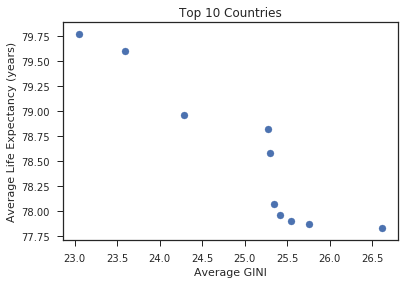

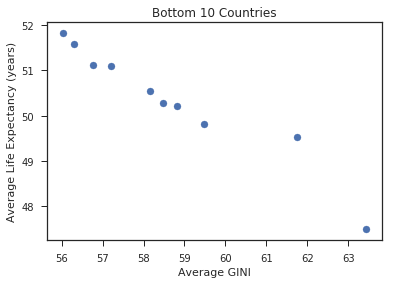

In [542]:
x = avg_gini_top_10
y = avg_life_exp_top_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average GINI')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Top 10 Countries')
plt.show()

x = avg_gini_bottom_10
y = avg_life_exp_bottom_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average GINI')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Bottom 10 Countries')
plt.show()

The scatter plots above demonstrate that there is some correlation between the Gini Coefficient and Life Expectancy. At first, we would say that it is a negative one, since it appears that the higher the Gini Coefficient, the lower the life expectany. However, one must remember that Gini is inversely rated, the lowest the Gini Coefficient the 'better'.
Therefore, this is in fact a timid but positive correlation, since as the coefficient drops life expectancy increases.

<a id='GDP'></a>
### GDP Per Capita and General Life Expectancy

### Is there a relationship between the GDP per capita and life expectancy? Can a higher GDP per capita contribute to a higher or lower life expectancy?

#### What are the top 10 countries in average GDP per capita?

In [543]:
avg_gdp_top_10 = avg_gdp.nlargest(10, )
avg_gdp_top_10

country
Equatorial Guinea    7.403196
South Korea          6.380020
Gabon                6.293078
China                5.928824
Botswana             5.301667
Bhutan               5.131137
Maldives             4.902408
Singapore            4.808431
Lebanon              4.339318
Malta                4.206706
dtype: float64

In [544]:
GDP_10_t_avg = avg_gdp_top_10.mean()
print('The average GDP per capita (PPP) among the top 10 countries is {}.'.format(round(GDP_10_t_avg)))

The average GDP per capita (PPP) among the top 10 countries is 5.0.


#### Are the top 10 countries GDP within the top 10 countries with the highest life expectancy?

In [545]:
df_combined_gdp_lf_exp_t_10 = pd.concat([(avg_life_exp_top_10), avg_gdp_top_10], axis=1, ignore_index=True, sort=True)
df_combined_gdp_lf_exp_t_10.columns=['avg_life_exp', 'avg_gdp_top_10']
df_combined_gdp_lf_exp_t_10.sort_values(by='avg_life_exp', ascending=False)

,avg_life_exp,avg_gdp_top_10
Andorra,79.770833,NaN
Japan,79.596078,NaN
Switzerland,78.956863,NaN
Iceland,78.821569,NaN
Sweden,78.578431,NaN
Greece,78.066667,NaN
Spain,77.962745,NaN
Norway,77.898039,NaN
Canada,77.870588,NaN
Italy,77.827451,NaN


> Likewise the comparison between life expectancy and the other variables, the NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_top_10 column, the country is not among the top 10 life expectancy. If NaN appears on the avg_gdp_top_10 the country is not among the top 10 GDP.

The above DataFrame (df_combined_gdp_lf_exp_t_10) shows that none of the countries with the highest GDPs are among the countries with the highest life expectancy. Which suggests that the GDP has no influence in life expectancy.

In [546]:
GDP_Proportion_T = ((0/10))*100
print('{} % of the top 10 GDP countries are among the top 10 countries with highest life expectancy.'.format(round(GDP_Proportion_T)))

0 % of the top 10 GDP countries are among the top 10 countries with highest life expectancy.


#### What are the bottom 10 countries in average GDP per capita?

In [547]:
avg_gdp_bottom_10 = avg_gdp.nsmallest(10, )
avg_gdp_bottom_10

country
Congo, Dem. Rep.           -1.330066
Central African Republic   -1.183586
Somalia                    -1.093566
Madagascar                 -0.748025
Tajikistan                 -0.497365
Kuwait                     -0.484290
Togo                       -0.304645
Kiribati                   -0.294218
North Korea                -0.218871
Zambia                     -0.216143
dtype: float64

In [548]:
GDP_10_b_avg = avg_gdp_bottom_10.mean()
print('The average GDP per capita (PPP) among the bottom 10 countries is {}.'.format(round(GDP_10_b_avg)))

The average GDP per capita (PPP) among the bottom 10 countries is -1.0.


In [549]:
Proportion_T_B_GDP = (-(GDP_10_t_avg/GDP_10_b_avg)-1)*100
print('The GDP per capita (PPP) in the top 10 countries is in average {} % greater than the GDP per capita (PPP) in the bottom 10 countries.'.format(round(Proportion_T_B_GDP)))

The GDP per capita (PPP) in the top 10 countries is in average 759.0 % greater than the GDP per capita (PPP) in the bottom 10 countries.


#### Are the bottom 10 countries GDP within the bottom 10 countries with the lowest life expectancy?

In [550]:
df_combined_gdp_lf_exp_b_10 = pd.concat([avg_life_exp_bottom_10, avg_gdp_bottom_10], axis=1, ignore_index=True, sort=True)
df_combined_gdp_lf_exp_b_10.columns=['avg_life_exp_bottom_10', 'avg_gdp_bottom_10']
df_combined_gdp_lf_exp_b_10.sort_values(by='avg_life_exp_bottom_10', ascending=False)

,avg_life_exp_bottom_10,avg_gdp_bottom_10
Ethiopia,51.829412,NaN
Eritrea,51.578431,NaN
Mali,51.111765,NaN
Sierra Leone,51.096078,NaN
Mozambique,50.554902,NaN
Niger,50.286275,NaN
Guinea-Bissau,50.211765,NaN
Malawi,49.815686,NaN
Burundi,49.535294,NaN
Central African Republic,47.492157,-1.183586


> Likewise the comparison between life expectancy and the other variables, the NaN values in the DataFrame above represent that a condition was not met. If NaN appears on the avg_life_exp_bottom_10 column, the country is not among the bottom 10 life expectancy. If NaN appears on the avg_gdp_bottom_10 the country is not among the bottom 10 GDP.

However, since we already did have NaN values in our <a href="#df_combined">Combined Dataframe</a> to start with. We will check if the value for the GDP is NaN in some rows because the information was not available in the first place, using the <a href="#df_combined">Combined Dataframe</a> (df_combined).

In [551]:
df_combined[df_combined.isnull().any(axis=1)]

,avg_life_exp,avg_life_exp_f,avg_life_exp_m,avg_gdp,avg_gini,avg_govt_health_spe
country,,,,,,
Andorra,79.770833,NaN,NaN,0.405657,40.000000,1450.0625
Dominica,72.958333,NaN,NaN,2.993549,40.000000,174.3750
Marshall Islands,62.277083,NaN,NaN,1.189616,40.000000,367.2500
North Korea,69.449020,70.386275,63.498039,-0.218871,37.000000,NaN
Palestine,69.560784,69.215686,65.764706,1.217592,34.100000,NaN
South Sudan,53.441176,47.358824,44.837255,1.479449,45.029412,NaN


Out of the NaN information left in the dataframe we are using for this analysis, none regards to the GDP. Therefore, the above findings are fine.

Continuing to explore the findings from the combined Dataframe of the bottom 10 GDP and the bottom 10 life expectancy (df_combined_gdp_lf_exp_b_10), only 1 country with the bottom 10 GDP is among the countries with the lowest life expectancy, Central African Republic.

We showed this by dropping all the NaN values from the combined DataFrame (df_combined_gdp_lf_exp_t_10) in the cell bellow.

In [552]:
df_combined_gdp_lf_exp_b_10.dropna(inplace=True)
df_combined_gdp_lf_exp_b_10

,avg_life_exp_bottom_10,avg_gdp_bottom_10
Central African Republic,47.492157,-1.183586


In [553]:
GDP_Proportion_B = ((1/10))*100
print('{} % of the bottom 10 GDP countries are among the bottom 10 countries with lowest life expectancy.'.format(round(GDP_Proportion_B)))

10 % of the bottom 10 GDP countries are among the bottom 10 countries with lowest life expectancy.


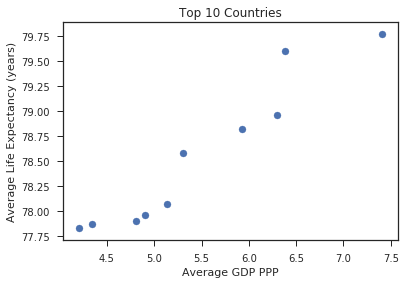

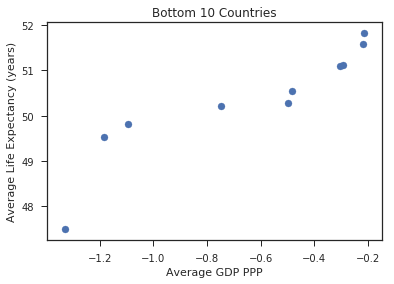

In [554]:
x = avg_gdp_top_10
y = avg_life_exp_top_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average GDP PPP')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Top 10 Countries')
plt.show()

x = avg_gdp_bottom_10
y = avg_life_exp_bottom_10
np.corrcoef(x,y)
plt.scatter(x, y)
plt.xlabel('Average GDP PPP')
plt.ylabel('Average Life Expectancy (years)')
plt.title('Bottom 10 Countries')
plt.show()

The scatter plots above demonstrate that there seems to be a positive correlation between GDP PPP and life expectancy. Where the greater the purchasing power the higher the life expectancy.  

<a id='conclusions'></a>
## Conclusions

> In this section we will summarize the findings and results derived from the Exploratory Analysis.

<a href="#FEMALE">Female and Male Life Expectancies</a>

We found that overall women tend to live in average 8% more than man.

<a href="#GENERAL">General Life Expectancy</a>

People in the top 10 countries in General Life Expectancy tend to live in average 56% longer than people in the bottom 10 countries.

<a href="#GOVT">Government Health Spending and General Life Expectancy</a>

With the findings acquired on our exploratory analysis it is possible to conclude that there seems to be a relationship between Government Health Spending and General Life Expectancy. The scatterplots showed that there is a positive correlation between the two variables. The correlation matrix and the comparisons between top and bottom government spending countries versus top and bottom life expectancy countries showed that the amount a government spends in health per person appears to be important and may influence in the life expectancy of a country. However, it is not a determinant variable. Other variables may affect life expectancy more heavily. 

<a href="#GINI">Gini Coefficient and General Life Expectancy</a>

With the findings acquired on our exploratory analysis it is possible to conclude that there seems to be a faint relationship between the income equality/inequality (Gini coefficient) and General Life Expectancy. The scatterplots showed that there is a linear correlation between the two variables. The correlation matrix and the comparisons between top and bottom Gini coefficient countries versus top and bottom life expectancy countries showed that the income equality may be an important variable for the life improvement of a population, but it seems to have little influence in the life expectancy of a country.

<a href="#GDP">GDP Per Capita (PPP) and General Life Expectancy</a>

With the findings acquired on our exploratory analysis it is possible to conclude that there seems to almost no relationship between the parity in purchasing power per capita (GDP - PPP) and General Life Expectancy. The scatterplots showed that there is a positive correlation between the two variables. Similarly, the Gini Index, the correlation matrix and the comparisons between top and bottom GDP PPP countries versus top and bottom life expectancy countries showed that the parity in purchasing power per capita (GDP - PPP) may be an important variable for the life improvement of a population, but it seems to have very little influence in the life expectancy of a country.

In [555]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0